*italicized text*# Graph Data Analytics

In [ ]:
#!conda install networkx --yes

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G = nx.karate_club_graph()
print("Graph named \"Zachary's Karate Club\" with", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges")

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


### Calculate page rank by using simple degree centrality

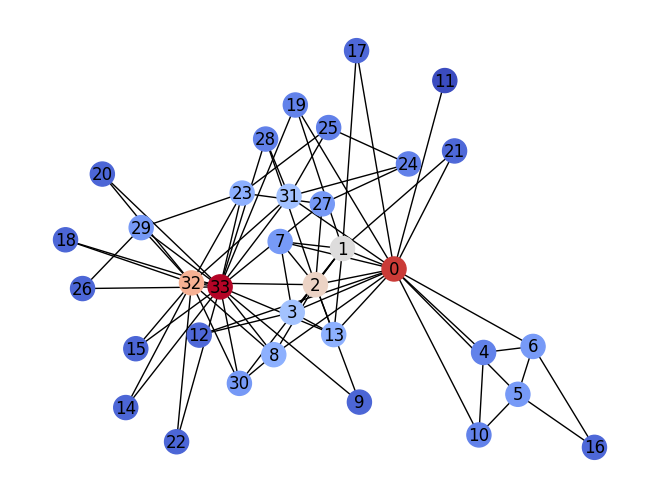

In [ ]:
def simple_pagerank(G, iter=100):
    p = np.array([1 for _ in G.nodes()])  # Initialize with equal weight for each node

    for _ in range(iter):
        new_p = np.zeros_like(p)
        for i in G.nodes():
            sum_p_j = 0
            for j in G.neighbors(i):
                sum_p_j += p[j] / G.degree(j)
            new_p[i] = sum_p_j

        # Normalize the centrality value to avoid overflow of numerical
        norm = np.linalg.norm(new_p)
        p = new_p / norm

    return p

G1 = nx.karate_club_graph()
values = simple_pagerank(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color=values, with_labels=True)
plt.show()

### Calculate page rank by updating the centrality of each node with the iteration

(34,)


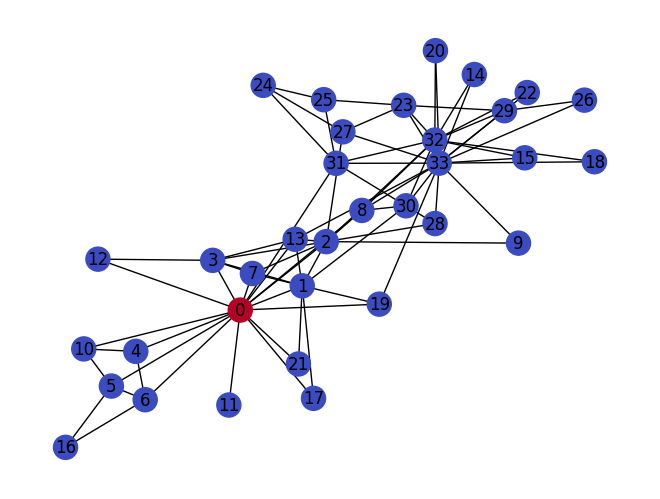

In [ ]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                try:
                    p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
                except:
                    pass

        norm = sum(p)
        p = p / norm
    return p


values = pagerank_centrality(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

In [ ]:
G = nx.read_edgelist("gr0.California.edges.txt")
G.remove_nodes_from(list(nx.isolates(G)))

print("Name:", "\nType: Graph")
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average degree:  ", sum(dict(G.degree()).values()) / len(G))

# Creating G1 with a subset of nodes
nodes_G1 = list(G.nodes())[100:150]
G1 = G.subgraph(nodes_G1)

print("Name:", "\nType: Graph")
print("Number of nodes:", G1.number_of_nodes())
print("Number of edges:", G1.number_of_edges())
print("Average degree:  ", sum(dict(G1.degree()).values()) / len(G1))

Name: 
Type: Graph
Number of nodes: 6175
Number of edges: 15969
Average degree:   5.172145748987854
Name: 
Type: Graph
Number of nodes: 50
Number of edges: 42
Average degree:   1.68


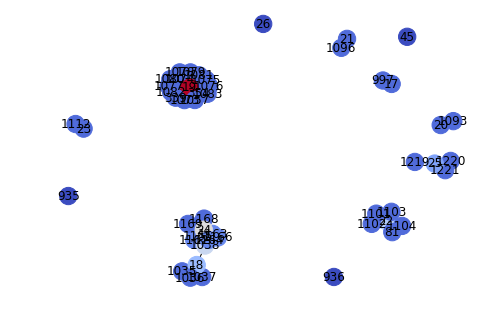

In [ ]:
values = simple_pagerank(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

(50,)


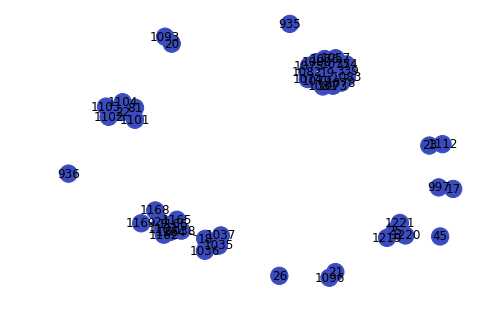

In [ ]:
values = pagerank_centrality(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)